# 2.1 n维数组

In [1]:
import torch

In [2]:
# 张量表示一个数值组成的数组
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
# 元素数量
x.numel()

12

In [5]:
x.reshape(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros(2, 3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones(2, 3, 4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.tensor([[2, 3, 4], [2, 3, 4], [2, 3, 4]])

tensor([[2, 3, 4],
        [2, 3, 4],
        [2, 3, 4]])

In [9]:
# 运算按照元素进行
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [10]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [11]:
# 拼接多个张量
x = torch.arange(12, dtype=torch.float32).reshape(3, 4)
y = torch.tensor([[1, 2, 3, 4], [1, 2, 3, 5], [2, 2, 2, 2]], dtype=torch.float32)
torch.cat((x, y), dim=0), torch.cat((x, y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  2.,  3.,  4.],
         [ 1.,  2.,  3.,  5.],
         [ 2.,  2.,  2.,  2.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  2.,  3.,  4.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  5.],
         [ 8.,  9., 10., 11.,  2.,  2.,  2.,  2.]]))

In [12]:
x == y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
x.sum()

tensor(66.)

In [14]:
# 广播机制
# (3, 1) + (1, 2) = (3, 2) + (3, 2)
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [15]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [16]:
x[-1], x[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [17]:
x[1, 2] = 9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
x[0:2, :] = 12
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [19]:
# 一些操作可能会给新结果重新分配内存
before = id(y)
y = y + x
id(y) == before

False

In [20]:
# 改写z，不改变内存地址，减少内存开销
z = torch.zeros_like(y)
print('id(z):', id(z))
z[:] = x + y
print('id(z)', id(z))

id(z): 1894885136400
id(z) 1894885136400


In [21]:
# +=与=的区别，减少内存开销
before = id(y)
y += x
id(y) == before

True

In [22]:
# 转换为numpy
A = x.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [23]:
a = torch.tensor(3.5)
a, a.item(), float(a), int(a)

(tensor(3.5000), 3.5, 3.5, 3)

# 2.2 数据预处理

In [24]:
import os

# exist_ok=False 默认，如果目录已存在抛出异常，不存在则创建,True,若不存在则创建，若存在不会抛异常，继续让它存在。
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRoom,Alley,Prize\n')
    f.write('NaN,Pave,127500\n')
    f.write('2,NaN,106600\n')
    f.write('4,NaN,140000\n')
    f.write('NaN,NaN,178000\n')

In [25]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRoom,Alley,Prize
0,NaN,Pave,127500
1,2.0,NaN,106600
2,4.0,NaN,140000
3,NaN,NaN,178000


In [26]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRoom,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [27]:
# pd.get_dummies相当于onehot编码，常用与把离散的类别信息转化为onehot编码形式。
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRoom,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [28]:
# 默认64位浮点数
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106600, 140000, 178000]))

In [29]:
# reshape在原数据修改
a = torch.arange(12)
b = a.reshape(3, 4)
b[:] = 2
a

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2.3 线性代数

In [30]:
x = torch.tensor([3.0])
y = torch.tensor([2.0])
x + y, x - y, x * y, x / y

(tensor([5.]), tensor([1.]), tensor([6.]), tensor([1.5000]))

In [31]:
x = torch.arange(12)
x[1]

tensor(1)

In [32]:
A = torch.arange(12).reshape(3, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [33]:
A.T

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [34]:
A = torch.arange(24).reshape(2, 3, 4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [35]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [36]:
# 对应元素相乘
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [37]:
a = 2
A + a, (a * A).shape

(tensor([[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.]]),
 torch.Size([5, 4]))

In [38]:
A = torch.arange(24*2, dtype=torch.float32).reshape(2, 4, 6)
A, A.shape # shape里面的第几个元素就是第几维度

(tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10., 11.],
          [12., 13., 14., 15., 16., 17.],
          [18., 19., 20., 21., 22., 23.]],
 
         [[24., 25., 26., 27., 28., 29.],
          [30., 31., 32., 33., 34., 35.],
          [36., 37., 38., 39., 40., 41.],
          [42., 43., 44., 45., 46., 47.]]]),
 torch.Size([2, 4, 6]))

In [39]:
# 维度求和
A.sum(axis=0)

tensor([[24., 26., 28., 30., 32., 34.],
        [36., 38., 40., 42., 44., 46.],
        [48., 50., 52., 54., 56., 58.],
        [60., 62., 64., 66., 68., 70.]])

In [40]:
A.sum(axis=1)

tensor([[ 36.,  40.,  44.,  48.,  52.,  56.],
        [132., 136., 140., 144., 148., 152.]])

In [41]:
A.sum(axis=[0, 1])

tensor([168., 176., 184., 192., 200., 208.])

In [42]:
A.mean(), A.sum()/ A.numel()

(tensor(23.5000), tensor(23.5000))

In [43]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[12., 13., 14., 15., 16., 17.],
         [18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34., 35.]]),
 tensor([[12., 13., 14., 15., 16., 17.],
         [18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29.],
         [30., 31., 32., 33., 34., 35.]]))

In [44]:
# 求和时维度不变,多出一维
sum_A = A.sum(axis=1, keepdims=True)
sum_A, A.sum(axis=1)

(tensor([[[ 36.,  40.,  44.,  48.,  52.,  56.]],
 
         [[132., 136., 140., 144., 148., 152.]]]),
 tensor([[ 36.,  40.,  44.,  48.,  52.,  56.],
         [132., 136., 140., 144., 148., 152.]]))

In [45]:
# 广播机制
A / sum_A

tensor([[[0.0000, 0.0250, 0.0455, 0.0625, 0.0769, 0.0893],
         [0.1667, 0.1750, 0.1818, 0.1875, 0.1923, 0.1964],
         [0.3333, 0.3250, 0.3182, 0.3125, 0.3077, 0.3036],
         [0.5000, 0.4750, 0.4545, 0.4375, 0.4231, 0.4107]],

        [[0.1818, 0.1838, 0.1857, 0.1875, 0.1892, 0.1908],
         [0.2273, 0.2279, 0.2286, 0.2292, 0.2297, 0.2303],
         [0.2727, 0.2721, 0.2714, 0.2708, 0.2703, 0.2697],
         [0.3182, 0.3162, 0.3143, 0.3125, 0.3108, 0.3092]]])

In [46]:
# 累加求和
A, A.cumsum(axis=0)

(tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10., 11.],
          [12., 13., 14., 15., 16., 17.],
          [18., 19., 20., 21., 22., 23.]],
 
         [[24., 25., 26., 27., 28., 29.],
          [30., 31., 32., 33., 34., 35.],
          [36., 37., 38., 39., 40., 41.],
          [42., 43., 44., 45., 46., 47.]]]),
 tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10., 11.],
          [12., 13., 14., 15., 16., 17.],
          [18., 19., 20., 21., 22., 23.]],
 
         [[24., 26., 28., 30., 32., 34.],
          [36., 38., 40., 42., 44., 46.],
          [48., 50., 52., 54., 56., 58.],
          [60., 62., 64., 66., 68., 70.]]]))

In [47]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.ones(4)
x, y

(tensor([1., 2., 3., 4.]), tensor([1., 1., 1., 1.]))

In [48]:
# 向量点积
torch.dot(x, y), torch.sum(x * y)

(tensor(10.), tensor(10.))

In [49]:
# 矩阵向量运算
A = A.reshape(12, 4)
x = torch.ones(4)
# 矩阵矩阵运算
B = torch.ones(4, 3)
torch.mv(A, x), torch.mm(A, B)

(tensor([  6.,  22.,  38.,  54.,  70.,  86., 102., 118., 134., 150., 166., 182.]),
 tensor([[  6.,   6.,   6.],
         [ 22.,  22.,  22.],
         [ 38.,  38.,  38.],
         [ 54.,  54.,  54.],
         [ 70.,  70.,  70.],
         [ 86.,  86.,  86.],
         [102., 102., 102.],
         [118., 118., 118.],
         [134., 134., 134.],
         [150., 150., 150.],
         [166., 166., 166.],
         [182., 182., 182.]]))

In [50]:
# 范数
# 2范数
u = torch.tensor([3.0, 4.0])
torch.norm(u)

tensor(5.)

In [51]:
# 一范数
torch.abs(u).sum()

tensor(7.)

In [52]:
# F范数
torch.norm(torch.ones(4, 9))

tensor(6.)

# 2.4 矩阵求导

In [53]:
# 计算y = 2 * x * xT
x = torch.arange(4, dtype=torch.float32)
x

tensor([0., 1., 2., 3.])

In [54]:
# 需要一个地方存储梯度 等价于x = torch.arange(4, requires_grad=True)
x.requires_grad_(True)
x.grad

In [55]:
# 定义y
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [56]:
# y反向传播求梯度
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [57]:
x.grad == 4 * x

tensor([True, True, True, True])

In [58]:
# pytorch默认会累计梯度，我们需要清除之前的梯度
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [59]:
# 一个值就是一个未知数
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [60]:
# 深度学习中不需要计算微分矩阵，而是批量中样本偏导数之和
x.grad.zero_()
# 四个x²的样本
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [61]:
# 将某些参数移动到计算图之外
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad, x.grad == u

(tensor([0., 1., 4., 9.]), tensor([True, True, True, True]))

In [62]:
x.grad.zero_()
y.sum().backward()
x.grad, x.grad == 2 * x

(tensor([0., 2., 4., 6.]), tensor([True, True, True, True]))

In [63]:
# python控制流可以改变导数
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(), requires_grad=True) # 标量
d = f(a)
d.backward()
a, a.grad == d / a, a.grad.zero_()

(tensor(-0.7045, requires_grad=True), tensor(True), tensor(0.))

# 2.5 微积分

In [64]:
# 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步
%matplotlib inline
import numpy as np
import d2l 
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [65]:
def use_svg_display():  #@save
    # 使用save格式绘图
    backend_inline.set_matplotlib_formats('svg')

In [66]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    # 设置matplotlib大小
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [67]:
#@save
# xlim()和 ylim()：设置 x，y 轴的数值显示范围
# xlabel()和 ylabel()：设置 x，y 轴的标签文本
# xscale 缩放
# grid()：绘制刻度线的网格线
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend): # 轴信息
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legehd(legend)
    axes.grid()

In [69]:
#@save
# 绘制数据点
def plot(X, Y=None, xlable=None, ylabel=None, legend=None, xlim=None, ylim=None, 
         xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
        
    set_figsize(figsize)
    
    # 如果有一个轴，输出True
    def has_one_axis(X):
        return 

# 2.6 概率论

In [70]:
%matplotlib inline
import torch
# 多项分布
from torch.distributions import multinomial
# 概率
fair_probs = torch.ones(6) / 6
# 抽样10次
multinomial.Multinomial(1000, fair_probs).sample() / 1000

tensor([0.1660, 0.1540, 0.1500, 0.1880, 0.1840, 0.1580])

In [71]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# 纵向累加
cum_counts = counts.cumsum(dim=0)
counts, cum_counts

(tensor([[2., 0., 3., 2., 2., 1.],
         [1., 1., 4., 0., 3., 1.],
         [3., 0., 1., 0., 5., 1.],
         ...,
         [2., 2., 1., 0., 2., 3.],
         [1., 1., 3., 0., 1., 4.],
         [1., 1., 2., 0., 2., 4.]]),
 tensor([[  2.,   0.,   3.,   2.,   2.,   1.],
         [  3.,   1.,   7.,   2.,   5.,   2.],
         [  6.,   1.,   8.,   2.,  10.,   3.],
         ...,
         [820., 832., 798., 815., 909., 806.],
         [821., 833., 801., 815., 910., 810.],
         [822., 834., 803., 815., 912., 814.]]))

In [72]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates

tensor([[0.2000, 0.0000, 0.3000, 0.2000, 0.2000, 0.1000],
        [0.1500, 0.0500, 0.3500, 0.1000, 0.2500, 0.1000],
        [0.2000, 0.0333, 0.2667, 0.0667, 0.3333, 0.1000],
        ...,
        [0.1647, 0.1671, 0.1602, 0.1637, 0.1825, 0.1618],
        [0.1645, 0.1669, 0.1605, 0.1633, 0.1824, 0.1623],
        [0.1644, 0.1668, 0.1606, 0.1630, 0.1824, 0.1628]])

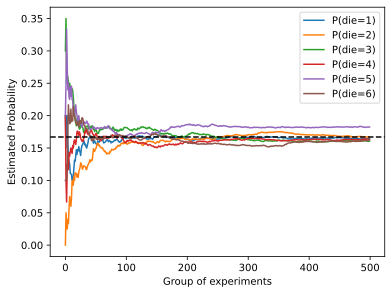

In [77]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i+1) + ")"))
# 绘制平行于x轴的水平参考线
# 利用plt.gca( )进行坐标轴的移动
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Group of experiments')
d2l.plt.gca().set_ylabel('Estimated Probability')
d2l.plt.legend()

In [79]:
# 2.7 查阅文档
import torch 
# 查找文档中的函数和类
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [81]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [89]:
torch.zeros?